In [1]:
from IPython.display import Image
%matplotlib inline


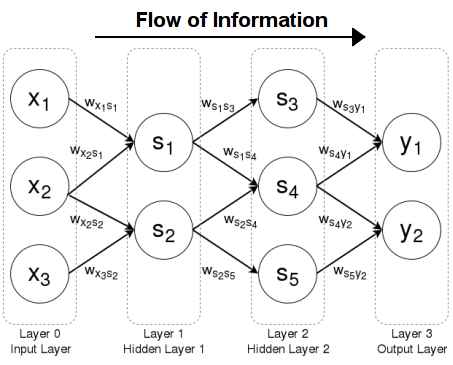

In [4]:
Image(filename='feedforward.png',width=600)

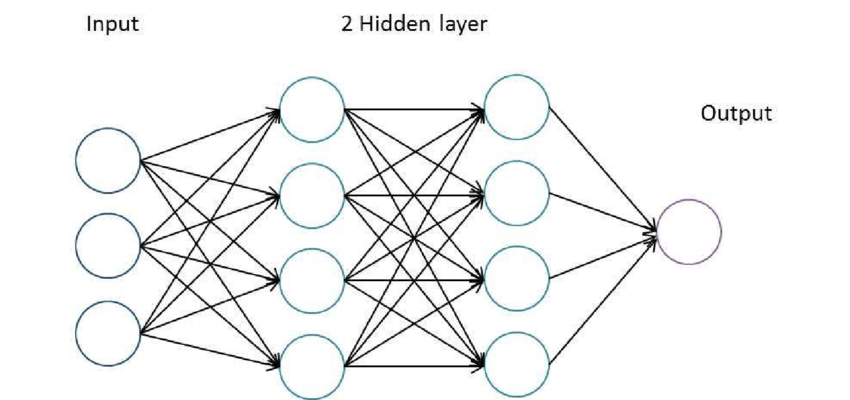

In [7]:
Image(filename='feedforward1.png',width=600)

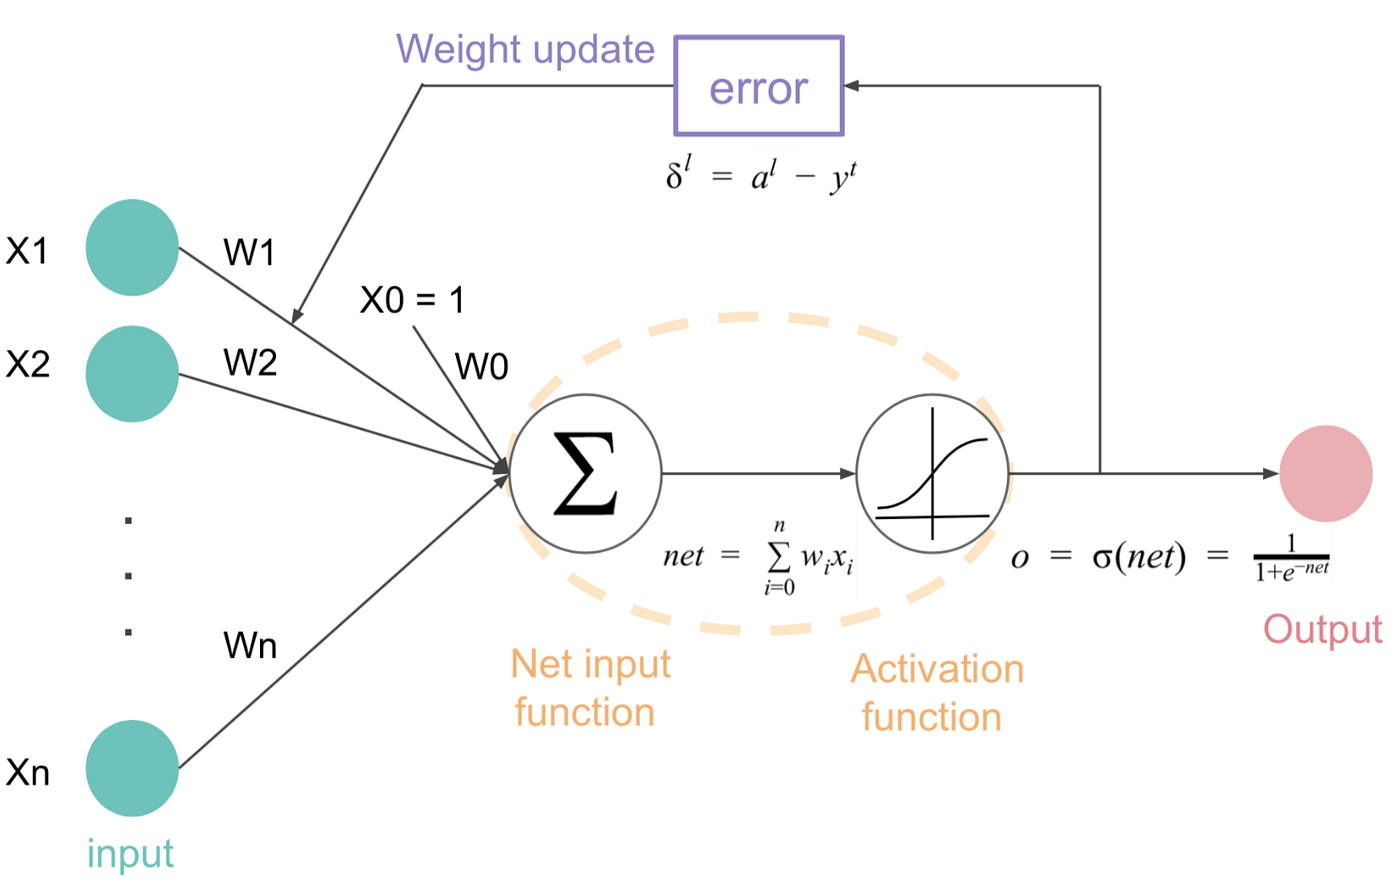

In [6]:
Image(filename='feedforward2.png', width=500)

# Implemet a multilayer perceptron

In [12]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(2)
        self.weights_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
        self.weights_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feed_forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def train(self, inputs, targets, num_iterations):
        for iteration in range(num_iterations):
            self.output = self.feed_forward(inputs)

            error_output = targets - self.output
            delta_output = error_output * self.sigmoid_derivative(self.output)

            error_hidden = delta_output.dot(self.weights_hidden_output.T)
            delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_layer_output)

            adjustment_output = self.hidden_layer_output.T.dot(delta_output)
            adjustment_hidden = inputs.T.dot(delta_hidden)

            self.weights_hidden_output += adjustment_output
            self.weights_input_hidden += adjustment_hidden

if __name__ == "__main__":
    neural_network = NeuralNetwork(input_size=3, hidden_size=4, output_size=1)

    print("Random starting weights:")
    print("Input to Hidden Weights:\n", neural_network.weights_input_hidden)
    print("Hidden to Output Weights:\n", neural_network.weights_hidden_output)

    training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = np.array([[0, 1, 1, 0]]).T

    neural_network.train(training_set_inputs, training_set_outputs, num_iterations=10000)

    print("Synaptic weights after training:")
    print("Input to Hidden Weights:\n", neural_network.weights_input_hidden)
    print("Hidden to Output Weights:\n", neural_network.weights_hidden_output)


Random starting weights:
Input to Hidden Weights:
 [[-0.1280102  -0.94814754  0.09932496 -0.12935521]
 [-0.1592644  -0.33933036 -0.59070273  0.23854193]
 [-0.40069065 -0.46634545  0.24226767  0.05828419]]
Hidden to Output Weights:
 [[-0.73084011]
 [ 0.02715624]
 [-0.63112027]
 [ 0.5706703 ]]
Synaptic weights after training:
Input to Hidden Weights:
 [[-3.50561794 -3.22740555 -2.51066271  4.20114057]
 [ 0.23917761  0.11777912 -0.36278642 -0.16779982]
 [ 0.9368303   0.82169674  0.6041666  -1.40105538]]
Hidden to Output Weights:
 [[-3.85544771]
 [-3.35950231]
 [-2.40197009]
 [ 6.46929552]]
